In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# SET THE RANDOM STATE 
RANDOM_STATE = 0 

# 1) Load the Data 

In [3]:
data = pd.read_csv("data/cs-training.csv", index_col=0)

# Take a peak at the data 
print(f"Num Entries: {data.shape[0]}")
print(f"Num Features: {data.shape[1]}")
display(data.head())
print(f"Features: {list(data.columns)}")

Num Entries: 150000
Num Features: 11


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Features: ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


# 2) Data Exploration

In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Label Balance Check 

In [5]:
# Get a look at the number of examples in each label / clasification group
data.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### Looking at Missing Values

In [6]:
# Print out the number of missing values for each feature 
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Visualizing the Distribution of Data for Each Feature

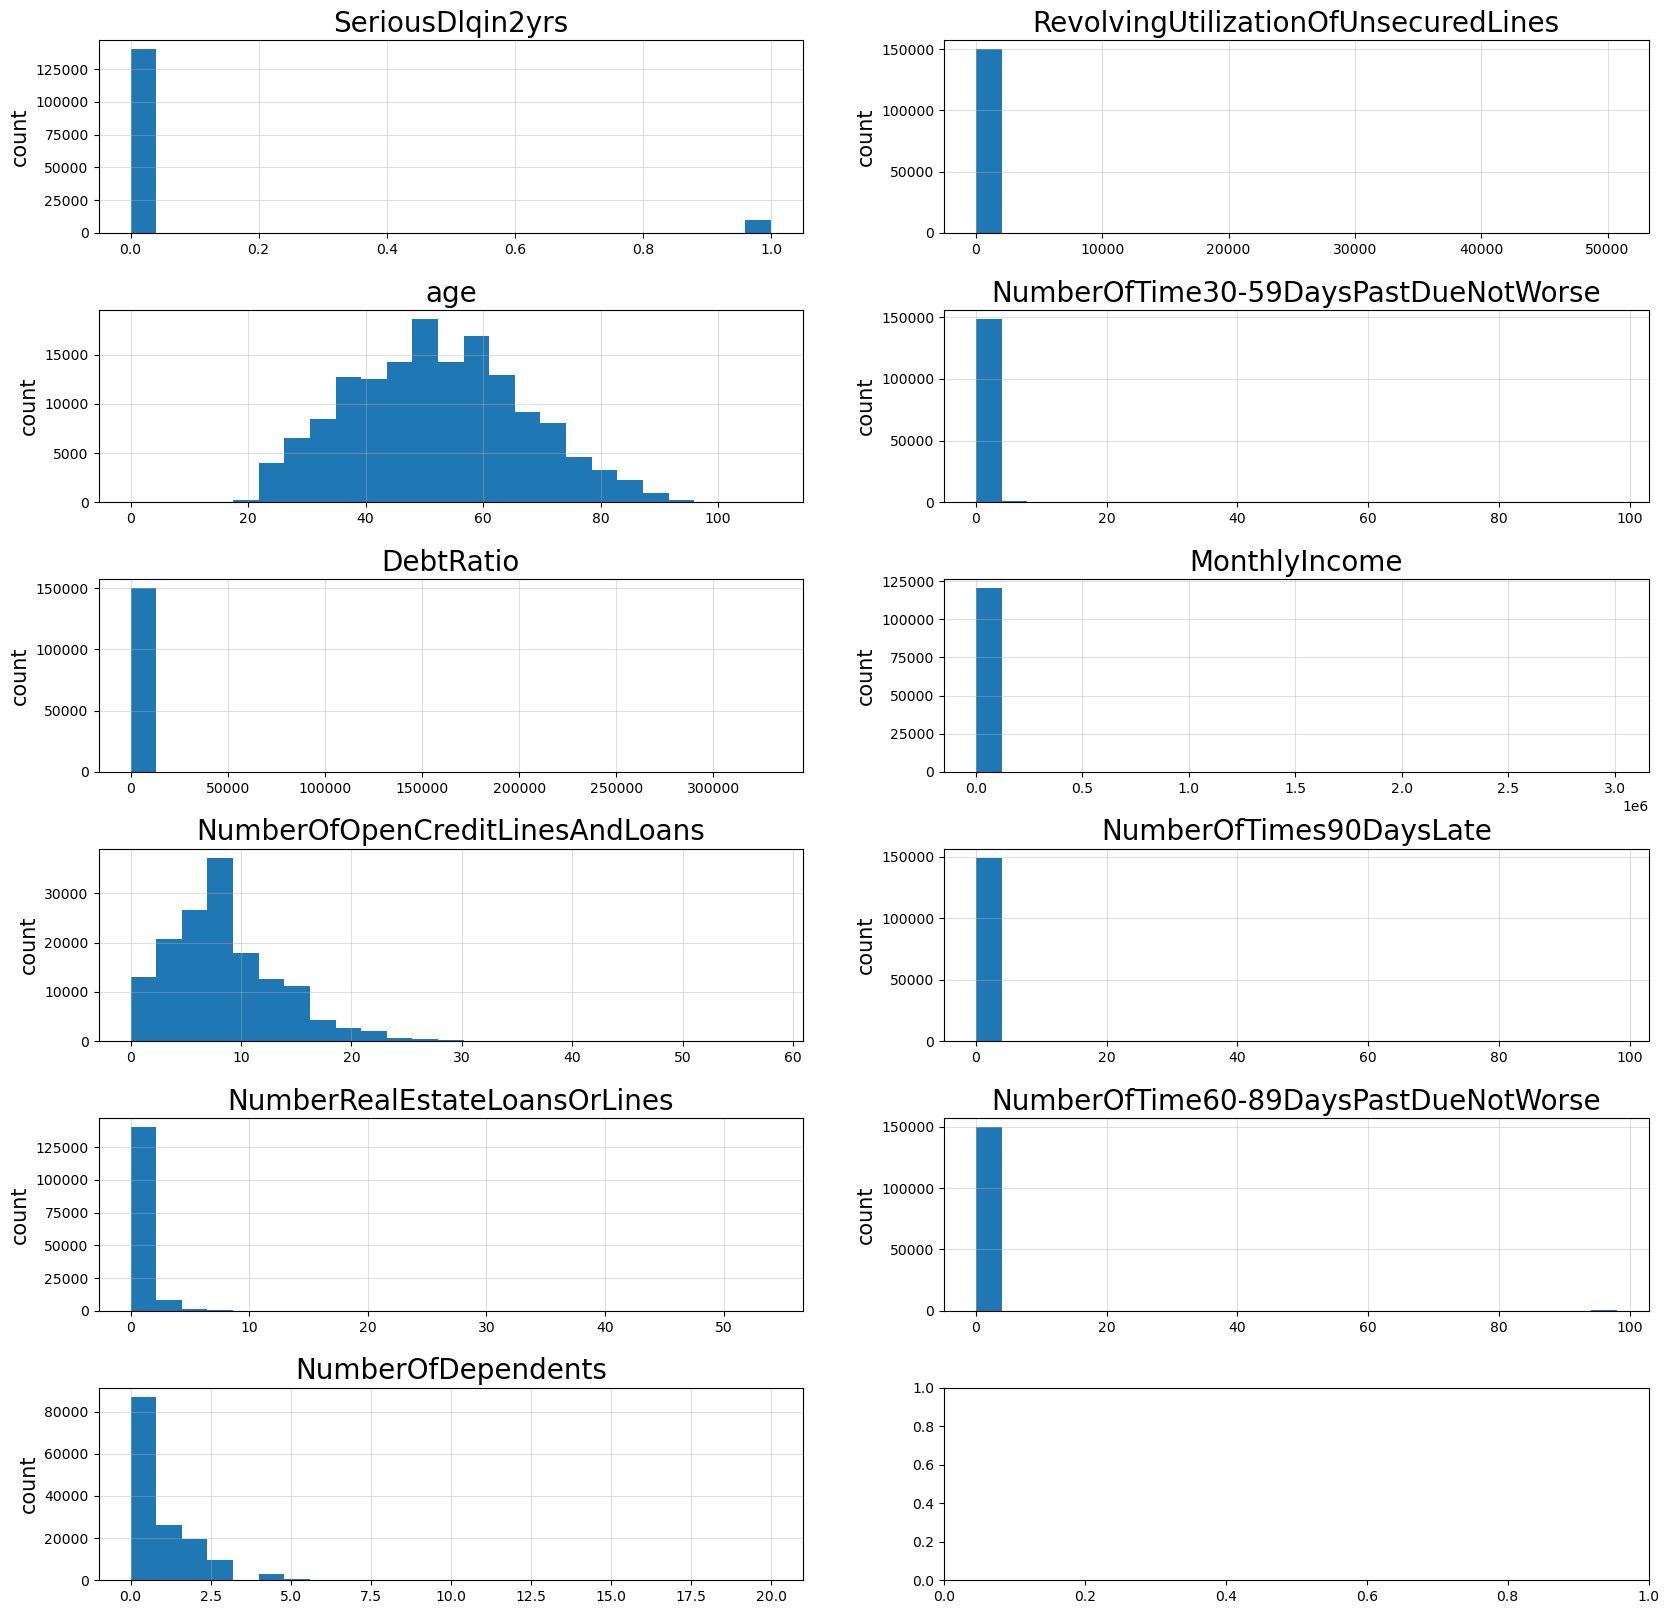

In [7]:
# Generate an Image to Visualize the distribution 
fig, axs = plt.subplots(6, 2, figsize=(20,20))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Go through each feature and custom make a histogram for it 
for idx, col in enumerate(data.columns): 
    fig_row, fig_col = idx//2, idx%2
    subplot = axs[fig_row, fig_col]
    subplot.hist(data[col], bins=25)
    subplot.set_title(col, fontsize=20)
    subplot.set_ylabel("count", fontsize=15)
    subplot.grid(alpha=0.4)
plt.savefig("initial_hist.png")

### Looking at Correlation Between Features

<AxesSubplot:>

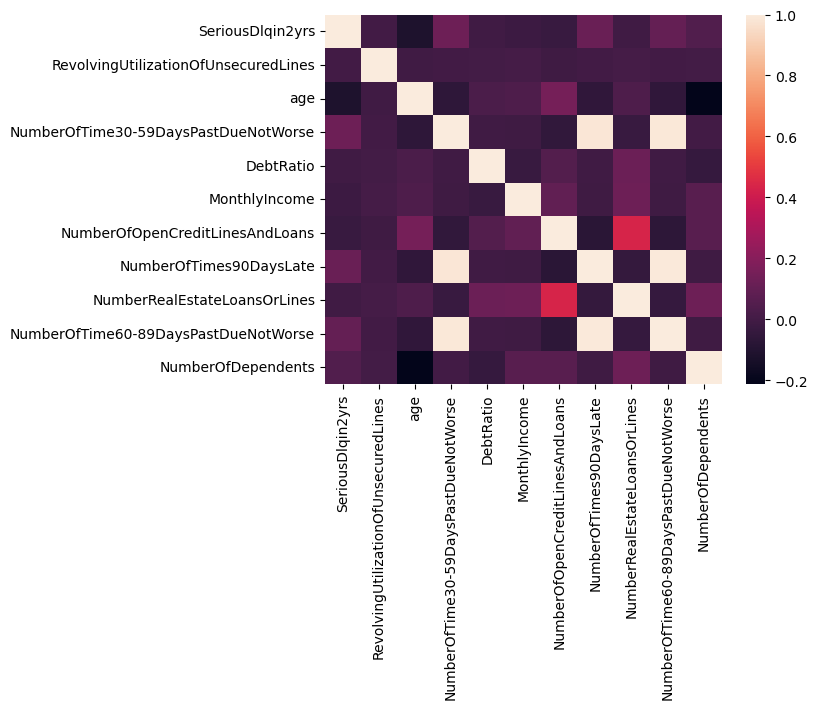

In [8]:
# represent feature correlation matrix using a heatmap
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 3) Data Wrangling

### Extract the Features and the labels from the dataset 

In [9]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

print(f"Shape of X: {X.shape}")
print(F"Shape of y: {y.shape}") 

Shape of X: (150000, 10)
Shape of y: (150000,)


### Perform a statified shuffle split for splitting the taining and testing data 

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create an instance of Stratified Shuffle Split 
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE) 

# Perform the stratified shuffle split 
for train_index, test_index in stratified_split.split(X, y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    
# Check the number of each type of label in the traning and test datasets 
print(F"Delinquent Train: {y_train.sum()}")
print(F"Delinquent Test: {y_test.sum()}")
print()
print(f"Non-Delinquent Train: {(y_train==0).sum()}")
print(F"Non_Delinquent Test: {(y_test==0).sum()}")

Delinquent Train: 8021
Delinquent Test: 2005

Non-Delinquent Train: 111979
Non_Delinquent Test: 27995


### Use an imputer to fill the missing values 

In [11]:
from sklearn.impute import SimpleImputer 

# Create Instance of Imputer using median strategy 
imputer = SimpleImputer(strategy="median") 

# Fit to the training data 
imputer.fit(X_train) 

# Save the index and columns before transformation 
index = X_train.index 
cols = X_train.columns 

# Perform the Imputer Tansformation 
X_train = imputer.transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols,
                          index=index)

# Check that the missing values were filled 
X_train.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Balance the Labels by undersampling the Major Class

In [12]:
from sklearn.utils import resample 
from sklearn.utils import shuffle

# Need to recombine the X_train and y_train for the down_sampling 
train = X_train.copy()
train["SeriousDlqin2yrs"] = y_train

# Get the counts for the minor class 
df_minor = train[train.SeriousDlqin2yrs == 1]
df_major = train[train.SeriousDlqin2yrs == 0] 

# Let's downsample the major class 
df_major_downsample = resample(df_major, 
                               replace=False, 
                               n_samples=df_minor.shape[0], 
                               random_state=RANDOM_STATE) 

# Combine the two classes back together 
df_downsample = pd.concat([df_major_downsample, df_minor])

# Check that the two labels are equal 
print("Check for if the labels are balanced: ") 
print(df_downsample.SeriousDlqin2yrs.value_counts())

# Shuffle the dataframe before splitting 
shuffled = shuffle(df_downsample, random_state=RANDOM_STATE) 

# Split the Downsampled data back into features & label 
X_train_bal, y_train_bal = shuffled.iloc[:, :-1], shuffled["SeriousDlqin2yrs"] 

# Check for proper splitting 
print()
print(f"Shape of X: {X_train_bal.shape}") 
print(f"Shape of y: {y_train_bal.shape}")

Check for if the labels are balanced: 
0    8021
1    8021
Name: SeriousDlqin2yrs, dtype: int64

Shape of X: (16042, 10)
Shape of y: (16042,)


### Looking at Feature Importances 

 1) RevolvingUtilizationOfUnsecuredLines 0.259576
 2) DebtRatio                      0.132057
 3) age                            0.118252
 4) MonthlyIncome                  0.113137
 5) NumberOfTimes90DaysLate        0.090206
 6) NumberOfTime30-59DaysPastDueNotWorse 0.089476
 7) NumberOfOpenCreditLinesAndLoans 0.082814
 8) NumberOfTime60-89DaysPastDueNotWorse 0.045476
 9) NumberRealEstateLoansOrLines   0.035114
10) NumberOfDependents             0.033892


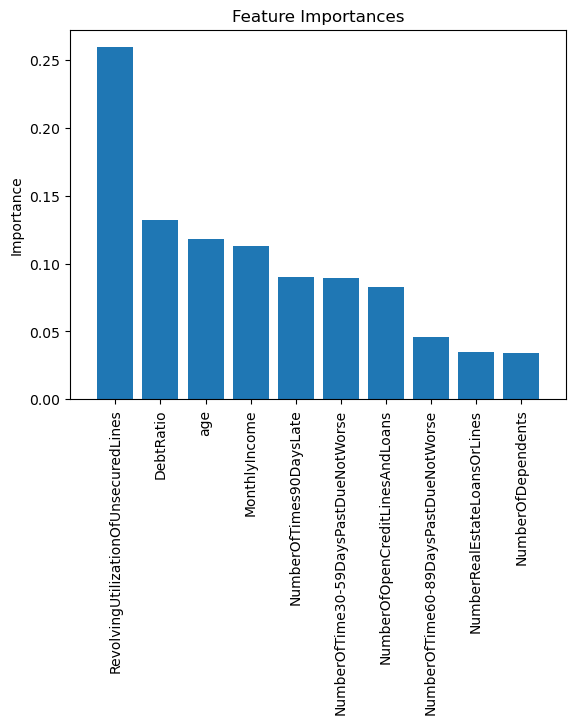

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


# Perform Standard Scaling 
scaler = StandardScaler() 
scaler.fit(X_train_bal) 
X_scale = scaler.transform(X_train_bal)

# Fit a random forest model to find feature importances 
feat_forest = RandomForestClassifier(n_estimators=500, 
                                     random_state=RANDOM_STATE) 
feat_forest.fit(X_scale, y_train_bal) 
importances = feat_forest.feature_importances_

# Sort features in descending order of importance 
# their indices are what should be sorted 
indices = np.argsort(importances)[::-1]

# Define the features 
features = X_train_bal.columns

# Print out feature importances 
for f in range(X_scale.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features[indices[f]], 
                            importances[indices[f]]))


# Make a figure showing the importances 
fig, axs = plt.subplots() 
axs.bar(range(X_scale.shape[1]), 
        importances[indices],
        align='center') 
axs.set_xticks(range(X_scale.shape[1]), 
           features[indices], rotation=90) 
axs.set_xlim([-1, X_scale.shape[1]]) 
axs.set_title("Feature Importances") 
axs.set_ylabel("Importance")
plt.show()

### Peform Dimensionality Reduction 

#### A) Principal Component Analysis 

Explained Variance Ratio: 
[0.30587879 0.16867738 0.11931453 0.10115368 0.09935303 0.07923475
 0.07456405 0.05026824 0.00102548 0.00053007]
Cumulative Sum of EVR: 
 [0.30587879 0.47455617 0.5938707  0.69502438 0.79437741 0.87361216
 0.94817621 0.99844445 0.99946993 1.        ]


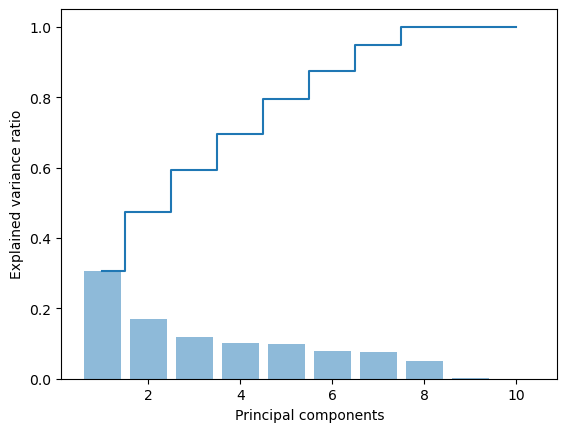

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


# Scale the balanced label training set 
scaler = StandardScaler() 
scaler.fit(X_train_bal) 
X_bal_scaled = scaler.transform(X_train_bal)

# Perform Principal Component Analysis 
pca = PCA() 
pca.fit(X_bal_scaled, y_train_bal) 

# Calculate cumulative sum of EVR 
cum_sum = np.cumsum(pca.explained_variance_ratio_)

# Plot the Explain Variance by # Principal Components 
print(f"Explained Variance Ratio: \n{pca.explained_variance_ratio_}")
print(F"Cumulative Sum of EVR: \n {cum_sum}")
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), cum_sum, where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [15]:
# Set the Explained Variance Threshold required for 
# determining number of principal components to use 
THRESHOLD_EVR = 0.9

# Calculate num_components 
n_components = np.argmax(cum_sum >= THRESHOLD_EVR) + 1
print(f"Number of Pricipal Components for PCA: {n_components}") 

# Principal Component Analysis 
pca = PCA(n_components=n_components)
X_train_bal_pca = pca.fit_transform(X_bal_scaled)

print(F"New shape of the data: {X_train_bal_pca.shape}") 

Number of Pricipal Components for PCA: 7
New shape of the data: (16042, 7)


#### B) Linear Discriminant Analysis

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Scale the balanced label training set 
scaler = StandardScaler() 
scaler.fit(X_train_bal) 
X_bal_scaled = scaler.transform(X_train_bal)

# Perform Linear Discriminant Analysis 
lda = LDA(n_components=1)
X_train_bal_lda = lda.fit_transform(X_bal_scaled, y_train_bal) 

# 4) Building and Testing Models 

In [17]:
# Define the number of trials to run 
# when performing nested cross validation 
NUM_TRIALS = 10 

## Nested Cross Validation Code to Assess Each Model Type to Determine which to move forward with

In [18]:
def perform_nested_CV(num_trials, model, p_grid, X, y): 
    """
    Returns a list of the scores and plots the nested 
    cross-validation scors for each trial. 
    """
    # Make an array to store the socres 
    nested_scores = np.zeros(num_trials) 
    
    # Loop for each trial 
    for i in range(num_trials): 
        # Choose cross-validation techniques for the inner and outer loops,
        # independently of the dataset.
        # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
        
        # Perform parameter search for optimal model 
        # on the inner CV 
        clf = GridSearchCV(estimator=model, 
                           param_grid=p_grid, 
                           cv=inner_cv)
        
        # Perform outer CV to score the optimal model 
        # found on the inner CV 
        nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
        nested_scores[i] = nested_score.mean()
        
    return nested_scores 

def plot_CV_scores(nested_scores): 
    """
    Generates a figure that plots the nested_scores 
    of the cross validations performed. 
    """
    # Print the average across all of the nested scores 
    print(f"Average CV Score: {np.mean(nested_scores)}") 
    
    # Plot the scores for each of the nested CV 
    # in nested scores file 
    fig, axs = plt.subplots() 
    axs.plot(nested_scores, color="b") 
    axs.set_ylabel("Score") 
    axs.set_xlabel("Trial #") 
    axs.grid(alpha=0.4) 
    return fig 

## 1) Logistic Regression Model - Nested CV - (Supervised) 

**Code is commented out because it takes a significant amount of time to run. The results can be visualized in the cell below the code.**

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# # Set up possible values of parameters to optimize over
# p_grid = {"C": [1, 10, 100], 
#           "solver": ["lbfgs", "liblinear"]}

# # Define the model 
# lr = LogisticRegression(solver="liblinear")

# # Define the features and label 
# # for nested CV
# X = X_train_bal_pca 
# y = y_train_bal

# # Perform the nested CV 
# nested_CV_scores = perform_nested_CV(NUM_TRIALS, lr, p_grid, X, y) 
# plt.show(plot_CV_scores(nested_CV_scores))

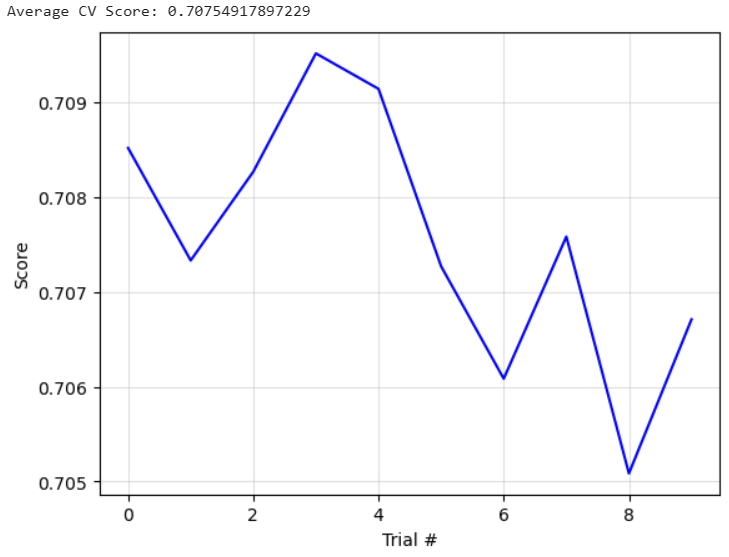

## 2) Support Vector Machine (SVM) - Nested CV - (Supervised) 

**Code is commented out because it takes a significant amount of time to run. The results can be visualized in the cell below the code.**

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC

# # Set up possible values of parameters to optimize over
# p_grid = {"C": [1, 10],
#           "gamma": [.01, .1]}

# # Define the model 
# svm = SVC(kernel="rbf")

# # Define the features and label 
# # for nested CV
# X = X_train_bal_pca 
# y = y_train_bal

# # Run the nested CV
# nested_CV_scores = perform_nested_CV(NUM_TRIALS, svm, p_grid, X, y) 
# plt.show(plot_CV_scores(nested_CV_scores))

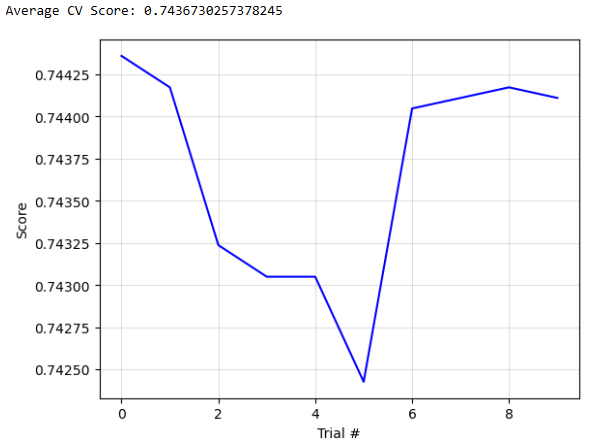

## 3) K-Means Clustering - (Unsupervised) 

#### A) Perform PCA Dimensionality Reduction to 2-D

In [21]:
# Principal Component Analysis for 2 Principal Components  
pca_2 = PCA(n_components=2)
X_train_bal_pca_2 = pca_2.fit_transform(X_bal_scaled)

print(F"New shape of the data: {X_train_bal_pca_2.shape}") 
print() 

# Determine contribution of each feature to each principal component 
dataset_pca_2 = pd.DataFrame(pca_2.components_, columns=cols, index=["PC_1", "PC_2"])

# Most Important Features for PC_1
print("Most Important Features for PC 1: ")
print(dataset_pca_2[abs(dataset_pca_2) > 0.3].iloc[0].dropna())
print() 

# Most Important Features for PC_2
print("Most Important Features for PC 2: ")
print(dataset_pca_2[abs(dataset_pca_2) > 0.3].iloc[1].dropna())
print() 

New shape of the data: (16042, 2)

Most Important Features for PC 1: 
NumberOfTime30-59DaysPastDueNotWorse    0.560500
NumberOfTimes90DaysLate                 0.563166
NumberOfTime60-89DaysPastDueNotWorse    0.562465
Name: PC_1, dtype: float64

Most Important Features for PC 2: 
MonthlyIncome                      0.443187
NumberOfOpenCreditLinesAndLoans    0.563457
NumberRealEstateLoansOrLines       0.592006
Name: PC_2, dtype: float64



#### B) Elbow Plot

In [22]:
def elbow_plot(data):
    # Get the distortions for each cluster number  
    distortions = []
    for i in range(1, 6):
        km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    
    # Make the figure 
    fig, axs = plt.subplots() 
    axs.plot(range(1, 6), distortions, marker="o")
    axs.set_xlabel("Number of Clusters") 
    axs.set_ylabel("Distortion") 
    plt.tight_layout() 
    return fig 

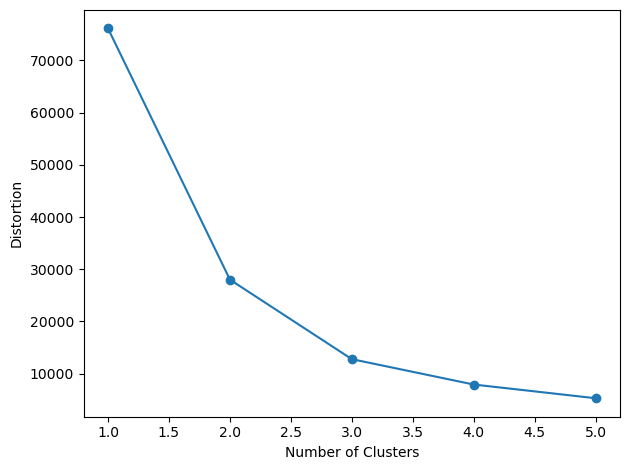

In [23]:
from sklearn.cluster import KMeans

# Make an elbow plot 
plt.show(elbow_plot(X_train_bal_pca_2))

# Based on the elbow plot, I would say that the 
# ideal number of clusters is 2. After two clusters 
# the distortion does not drastically decrease per cluster added. 

#### C) Perform K-means Clustering

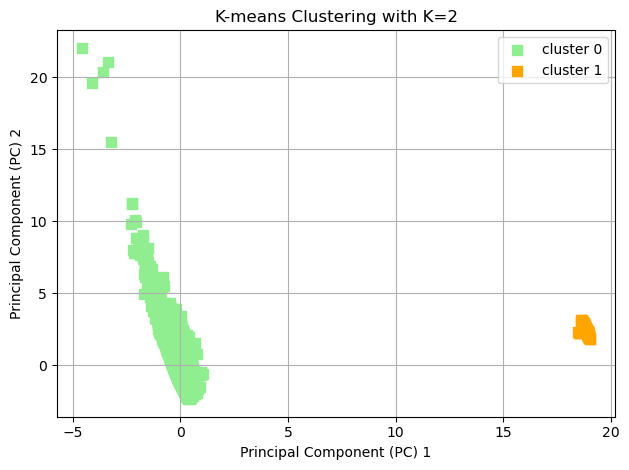

In [24]:
def print_cluster(model, n_clusters, X):
    y_km = model.fit_predict(X)
    color_list = ['lightgreen', 'orange', 'lightblue', 'red', 'yellow', 'brown', 'cyan']
    for i in range(n_clusters):
        plt.scatter(X[y_km == i, 0],
        X[y_km == i, 1],
        s=50,
        c=color_list[i],
        marker='s',
        label='cluster ' + str(i))
    plt.xlabel("Principal Component (PC) 1")
    plt.ylabel("Principal Component (PC) 2")
    plt.title(f"K-means Clustering with K={n_clusters}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

km = KMeans(n_clusters=2, 
        init='k-means++', 
        n_init=10, 
        max_iter=300,
        tol=1e-04,
        random_state=0)

print_cluster(km, 2, X_train_bal_pca_2)

#### D) Analyze Labels in Clusters

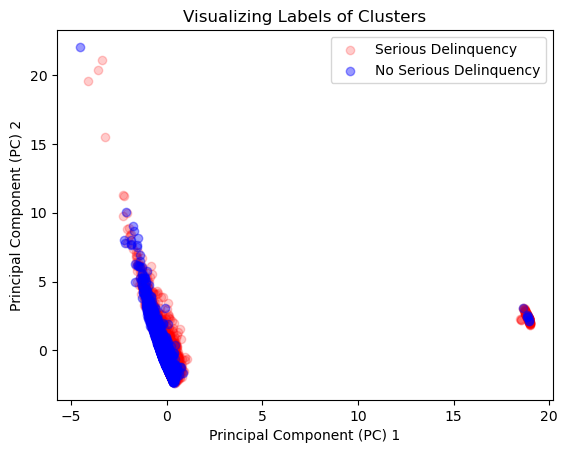

In [25]:
fig, axs = plt.subplots() 

axs.scatter(X_train_bal_pca_2[y_train_bal == 1, 0], 
            X_train_bal_pca_2[y_train_bal == 1, 1], 
            color="red", 
            alpha=0.2, 
            label="Serious Delinquency")

axs.scatter(X_train_bal_pca_2[y_train_bal == 0, 0], 
            X_train_bal_pca_2[y_train_bal == 0, 1], 
            color="blue", 
            alpha=0.4, 
           label="No Serious Delinquency")

axs.legend()
plt.xlabel("Principal Component (PC) 1")
plt.ylabel("Principal Component (PC) 2")
plt.title(f"Visualizing Labels of Clusters")
plt.show()

## 4) Random Forest - Nested CV - (Supervised)

**Code is commented out because it takes a significant amount of time to run. The results can be visualized in the cell below the code.**

In [26]:
from sklearn.ensemble import RandomForestClassifier

# # Set up possible values of parameters to optimize 
# p_grid = {"max_depth": [4, 6, 8], 
#          "min_samples_leaf": [30, 100]}

# # Create the random forest classifier 
# rfc = RandomForestClassifier(n_estimators=10, 
#                              criterion='gini', 
#                              random_state=RANDOM_STATE)

# # Define the features and label 
# # for nested CV
# X = X_train_bal 
# y = y_train_bal

# # Run the nested CV
# nested_CV_scores = perform_nested_CV(10, rfc, p_grid, X, y) 
# plt.show(plot_CV_scores(nested_CV_scores))

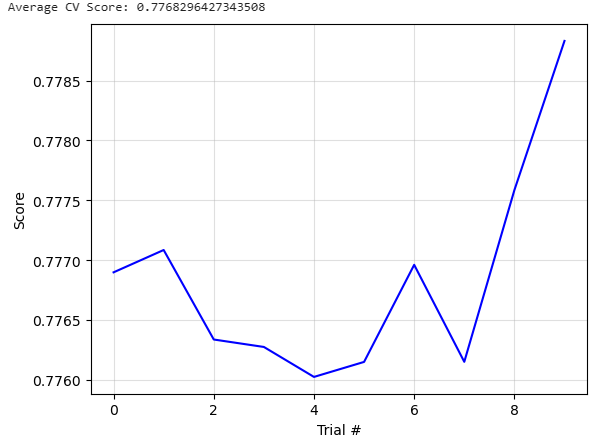

# 5) Random Forest Classifier Hyperparameter Tuning 

## Code for Testing Parameter Values 

In [27]:
from sklearn.model_selection import validation_curve

def plot_scores(param_name, train_mean, train_std, test_mean, test_std): 
    """
    Makes a plot of the parameter values and their 
    corresponding training and testing accuracies. 
    """
    fig, axs = plt.subplots()
    
    # Plot the accuracy values 
    axs.plot(param_range, train_mean, 
             color="blue", 
             marker="o", 
             markersize=5, 
             label="Training")
    axs.plot(param_range, 
             test_mean, 
             color="green", 
             linestyle="--", 
             marker="s", 
             markersize=5, 
             label="Validation") 
    
    # Plot the standard deviation range
    axs.fill_between(param_range, 
                     train_mean + train_std, 
                     train_mean - train_std, 
                     alpha=0.15, 
                     color="blue")
    axs.fill_between(param_range, 
                     test_mean + test_std, 
                     test_mean - test_std, 
                     alpha=0.15, 
                     color="green")
    
    # Make the formatting better 
    axs.set_title(f"Testing {param_name} Values")
    axs.set_ylabel("Accuracy") 
    axs.set_xlabel(f"{param_name} value")
    plt.grid(0.4)
    plt.legend()
    return fig
    
def run_param_test(model, param_name, param_range, X_train, y_train): 
    """
    Perform a validation curve and plot the results. 
    
    model: sklearn model to test 
    param_name: string matching parameter to test for model 
    param_lst: possible values for testing given parameter
    X_train: data to use to train and test the model 
    y_train: labels for the data
    """
    # Run the validation curve 
    train_scores, test_scores = validation_curve(estimator=model, 
                                                 X=X_train, 
                                                 y=y_train, 
                                                 param_name=param_name, 
                                                 param_range=param_range, 
                                                 cv=10) 
    # Calculate the mean and standard deivatins 
    train_mean = np.mean(train_scores, axis=1) 
    train_std = np.std(train_scores, axis=1) 
    test_mean = np.mean(test_scores, axis=1) 
    test_std = np.std(test_scores, axis=1)      
        
    # Plot the results 
    plt.show(plot_scores(param_name, train_mean, train_std, test_mean, test_std))
    
    # return dictionary 
    return train_scores, test_scores  

## A) Testing N_Estimators

Code commented out since it takes a long time to run. 

In [28]:
# # Define the model for testing 
# rfc = RandomForestClassifier(criterion="gini", 
#                              random_state=RANDOM_STATE)

# # Define the parameters for testing 
# param_name = 'n_estimators'
# param_range = [1, 5, 8, 12, 15, 18, 25, 30, 50, 75, 100] 

# # run the testing 
# train_scores, test_scores = run_param_test(rfc, param_name, param_range, X_train_bal, y_train_bal)

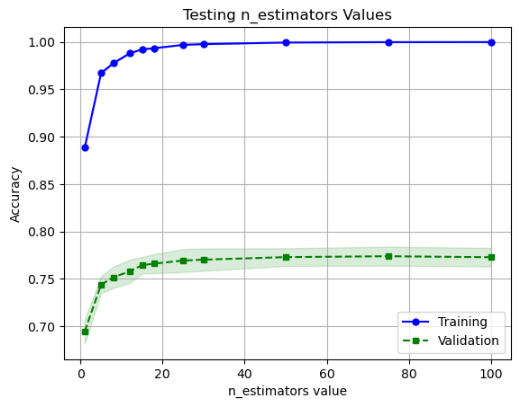

## B) Testing Max Depth

Code commented out since it takes a long time to run. 

In [29]:
# # Define the model for testing 
# rfc = RandomForestClassifier(criterion="gini", 
#                              random_state=RANDOM_STATE)

# # Define the parameters for testing 
# param_name = 'max_depth'
# param_range = range(1, 40, 2)

# # run the testing 
# train_scores, test_scores = run_param_test(rfc, param_name, param_range, X_train_bal, y_train_bal)

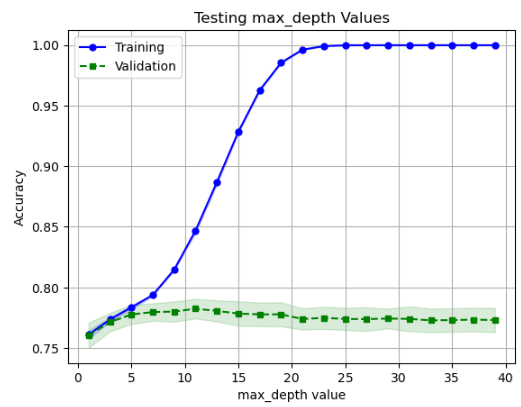

## C) Testing Max Features 

Code commented out since it takes a long time to run. 

In [30]:
# # Define the model for testing 
# rfc = RandomForestClassifier(criterion="gini",
#                              random_state=RANDOM_STATE)

# # Define the parameters for testing 
# param_name = 'max_features'
# param_range = range(1, 11)

# # run the testing 
# train_scores, test_scores = run_param_test(rfc, param_name, param_range, X_train_bal, y_train_bal)

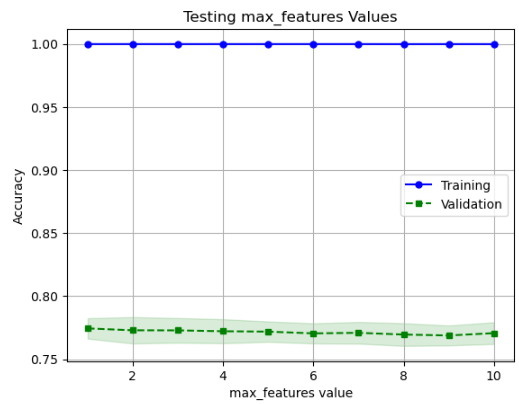

## D) Testing Min Samples Leaf 

Code commented out since it takes a long time to run. 

In [31]:
# # Define the model for testing 
# rfc = RandomForestClassifier(criterion="gini", 
#                              random_state=RANDOM_STATE)

# # Define the parameters for testing 
# param_name = 'min_samples_leaf'
# param_range = range(1, 100, 4)

# # run the testing 
# train_scores, test_scores = run_param_test(rfc, param_name, param_range, X_train_bal, y_train_bal)

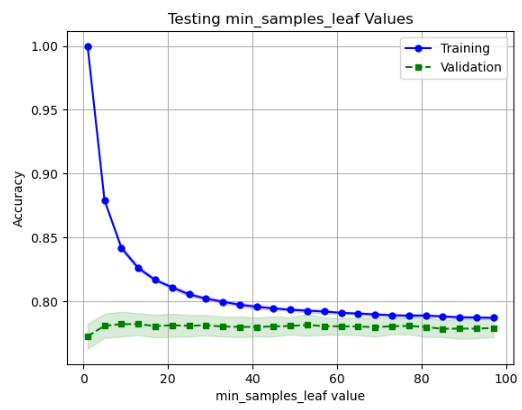

## E) Perform Randomized CV Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# Make the parameters to search 
param_distribs = {'n_estimators': randint(low=15, high=25),
                  'max_features': randint(low=1, high=10), 
                  'max_depth': randint(low=3, high=8), 
                  'min_samples_leaf': randint(low=45, high=100)
                 }
# Define the model 
rfc = RandomForestClassifier(criterion="gini", 
                             random_state=RANDOM_STATE)
# Perform the randomized search 
rnd_search = RandomizedSearchCV(rfc, 
                                param_distributions=param_distribs, 
                                n_iter=50, 
                                cv=5, 
                                scoring='accuracy', 
                                random_state=RANDOM_STATE)
rnd_search.fit(X_train_bal, y_train_bal)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C37CF8E130>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C37CF39EB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C30827DF70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002C37CF39DF0>},
                   random_state=0, scoring='accuracy')

In [33]:
print(f"Best Model Accuracy: {rnd_search.best_score_}")
print(f"Best Model Parameters: {rnd_search.best_params_}")

Best Model Accuracy: 0.7811989968985296
Best Model Parameters: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 48, 'n_estimators': 19}


In [34]:
# Collect the results 
cvres = rnd_search.cv_results_

# Iterate through scores and params and add to results list 
results = [] 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    results.append((mean_score, params))

# Print score and parameters in decreasing order of accuracy 
results.sort(key=lambda x: -x[0])
for result in results: 
    print(*result)

0.7811989968985296 {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 48, 'n_estimators': 19}
0.780824776637403 {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 45, 'n_estimators': 18}
0.7803885036551655 {'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 59, 'n_estimators': 19}
0.7800769966638407 {'max_depth': 7, 'max_features': 9, 'min_samples_leaf': 69, 'n_estimators': 18}
0.7797028346864219 {'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 47, 'n_estimators': 24}
0.7796406265420898 {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 66, 'n_estimators': 22}
0.7792664645646713 {'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 90, 'n_estimators': 21}
0.7792040038576044 {'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 95, 'n_estimators': 19}
0.7788924774383765 {'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 71, 'n_estimators': 17}
0.778767730875367 {'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 57, 'n_estimators': 24}
0.7785807178

# 6) Training Final Model Based on the Randomized Search

In [35]:
print(f"Best Model Parameters: {rnd_search.best_params_}")

Best Model Parameters: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 48, 'n_estimators': 19}


In [36]:
# Define the model 
final_rfc = RandomForestClassifier(criterion="gini", 
                                   max_depth=7, 
                                   max_features=5, 
                                   min_samples_leaf=48, 
                                   n_estimators=19, 
                                   random_state=RANDOM_STATE)

# Train the model on the entire training dataset 
final_rfc.fit(X_train_bal, y_train_bal) 

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=48,
                       n_estimators=19, random_state=0)

# 7) Preparing Test Data And Testing Model for Accuracy

### Preparing Test Data

In [37]:
# Check missing values before using the imputer 
X_train.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [38]:
# Prepare the test data in the same manner as the training data 

# Save the index and columns before transformation 
index = X_test.index 
cols = X_test.columns 

# Fill the missing values with same values used in training set
X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, 
                       columns=cols,
                       index=index)

# Check that the missing values were filled 
X_test.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Making Test Predictions and Assessing Accuracy

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Make the predictions 
y_pred = final_rfc.predict(X_test) 

# Calculate probabilities for ROC curve 
y_probs = final_rfc.predict_proba(X_test)[:, 1]

In [40]:
TN = np.sum((y_pred==0) & (y_test==0))
TP = np.sum((y_pred==1) & (y_test==1))
FP = np.sum((y_pred==1) & (y_test==0))
FN = np.sum((y_pred==0) & (y_test==1))

print(F"Number of Samples: {len(y_pred)}")
print(F"Number Positive: {np.sum(y_test==1)}")
print(F"Number Negative: {np.sum(y_test==0)}")
print("-------------------")

print(F"True Positive (TN): {TP}")
print(F"True Negative (TN): {TN}")
print(F"False Positive (TN): {FP}")
print(F"False Negative (TN): {FN}")

Number of Samples: 30000
Number Positive: 2005
Number Negative: 27995
-------------------
True Positive (TN): 1579
True Negative (TN): 21815
False Positive (TN): 6180
False Negative (TN): 426


In [41]:
# Score the predictions 
accuracy = accuracy_score(y_test, y_pred)
precision = TP / (TP + FP) 
recall = TP / (TP + FN) 
f1 = (2*precision*recall) / (precision + recall) 

print(f"Model Accuracy: {np.round(accuracy, 4)}")
print(F"Precision: {np.round(precision, 4)}") 
print(f"Recall: {np.round(recall, 4)}") 
print(f"F1 Score: {np.round(f1, 4)}") 

Model Accuracy: 0.7798
Precision: 0.2035
Recall: 0.7875
F1 Score: 0.3234


AUC: 0.8607407004902461


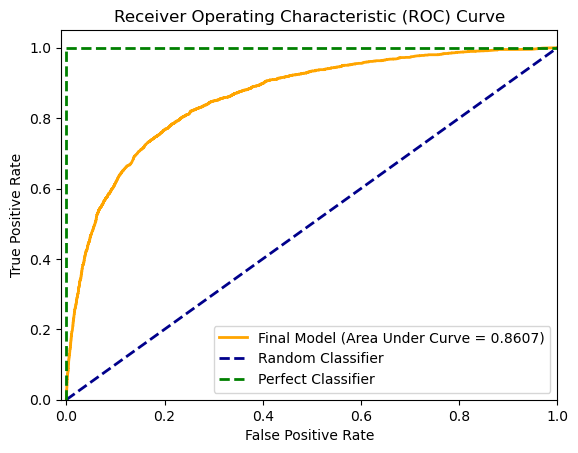

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate the Area Under Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot the ROC curve 
fig, axs = plt.subplots()
axs.plot(fpr, tpr, 
         color="orange", 
         lw=2,
         label=f"Final Model (Area Under Curve = {np.round(roc_auc, 4)})")

axs.plot([0, 1], [0, 1], 
         color="darkblue", 
         lw=2, 
         linestyle='--', 
         label="Random Classifier")

axs.plot([0, 1], [1, 1], 
         color="green", 
         lw=2, 
         linestyle='--', 
         label="Perfect Classifier")
axs.plot([0, 0], [0, 1], 
         color="green", 
         lw=2, 
         linestyle='--')

axs.set_xlim([-0.01, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()